# MNIST

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv("test.csv")

In [3]:
def df_to_img(row:int,df:pd.DataFrame,show=True,return_img=False):
    img = df.iloc[row,:784].values.reshape(28,28)
    if show:
        plt.imshow(img,cmap='gray')
        plt.show()
    if return_img: return img
    

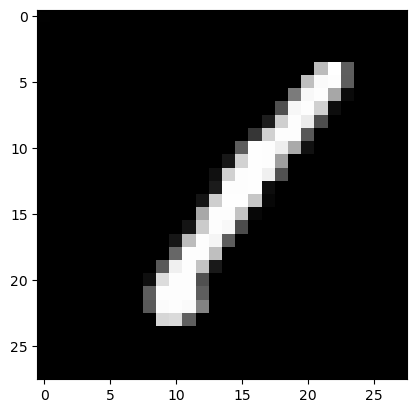

In [4]:
df_to_img(0,raw_train)

In [5]:
raw_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
# import knn 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# split val and train 
X, val_X,y,val_y = train_test_split(raw_train.iloc[:,1:].values,raw_train.iloc[:,0].values,test_size=0.2)
X.shape, y.shape
test_X = raw_test.values
X = X/255.0
test_X = test_X/255.0
val_X = val_X/255.0

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder()

val_y = ohe_encoder.fit_transform(val_y.reshape(-1,1))
y = ohe_encoder.fit_transform(y.reshape(-1,1))

In [8]:
val_X.shape, val_y.shape, X.shape, y.shape

((8400, 784), (8400, 10), (33600, 784), (33600, 10))

In [9]:
val_y = val_y.toarray()
y = y.toarray()

## try with plain KNN 

In [10]:
# from sklearn.neighbors import KNeighborsClassifier 
# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(X,y)
# val_y_pred = knn.predict(val_X)
# from sklearn.metrics import accuracy_score
# accuracy_score(val_y,val_y_pred)
# y_test_pred = knn.predict(raw_test.values)
## convert to csv
# pd.DataFrame({"ImageId":np.arange(1,len(y_test_pred)+1),"Label":y_test_pred}).to_csv("plain_knn_submission.csv",index=False)

# Data Visualization

In [11]:
import seaborn as sns

<BarContainer object of 10 artists>

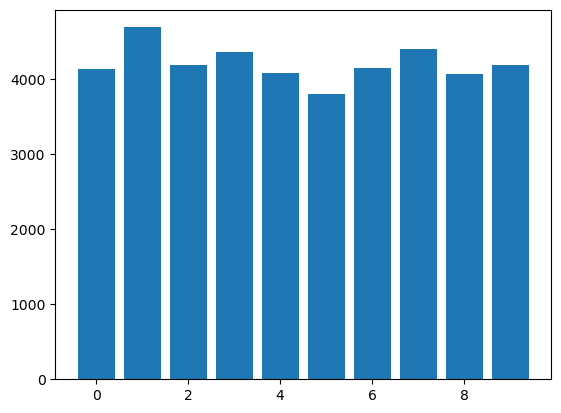

In [12]:
val,count = np.unique(raw_train.iloc[:,0],return_counts=True)
plt.bar(x=val,height=count)


# Choose Model 

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,y)
val_y_pred = rf.predict(val_X)
accuracy_score(val_y,val_y_pred) 

0.878452380952381

In [14]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200,300,400],
#     # 'max_depth': [5, 10],
#     # 'max_samples': [0.8, 1],
#     # 'min_samples_split': [2, 5,10],
#     # 'min_samples_leaf': [1, 2,4]
# }

# grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', return_train_score=True, n_jobs=-1)
# grid_search.fit(X, y)
# grid_search.best_params_, grid_search.best_score_

take to long to fine tune, so just ignore other approach and go straight to the CNN

In [15]:
raw_train.shape, raw_test.shape

((42000, 785), (28000, 784))

In [16]:
X_train = raw_train.iloc[:,1:].values
y_train = raw_train.iloc[:,0].values
# normalize the gray scale
X_train = X_train/255.0
X_test = raw_test.values/255.0

In [17]:
X_train =X_train.reshape(-1,28,28,1)
X_test =X_test.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

# DNN approach for Mnist

In [18]:
from keras.utils import to_categorical
y_train = to_categorical(y_train) # one hot encoding the output 
y_train.shape

(42000, 10)

<BarContainer object of 10 artists>

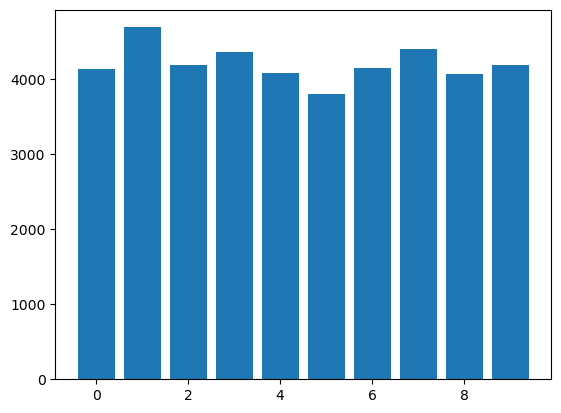

In [19]:
val,count = np.unique(raw_train.iloc[:,0],return_counts=True)
plt.bar(x=val,height=count)

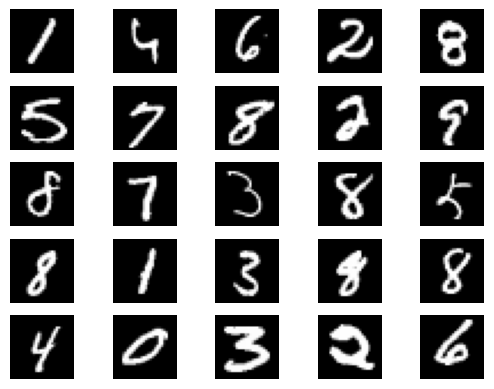

In [20]:
def random_plot(X:np.ndarray):
    idx = np.random.randint(0,X.shape[0],size=25)
    
    for i,id in enumerate(idx):
        plt.subplot(5,5,i+1)
        plt.imshow(X[id].reshape(28,28),cmap='gray')
        plt.axis('off')
    plt.show()

random_plot(X_train)

In [25]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

## LeNet


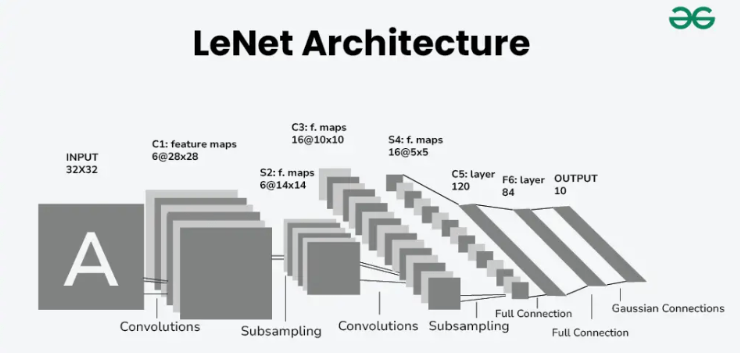

In [27]:
# The model proposed by Yann LeCun\
"""
  Input -> Conv2D (relu)-> AvgPool2D -> Conv2D(relu) -> AvgPool2D -> Flatten -> Dense  -> Dense (softmax) 
"""
0

0

For the detailed of each layer, revise the old note. 

In [58]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [35]:
model = Sequential()
model.add(Conv2D(filters=6,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [39]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,390 (278.87 KB)

 Trainable params: 71,390 (278.87 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.9837 - val_loss: 0.0571
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9971 - loss: 0.0133 - val_accuracy: 0.9845 - val_loss: 0.0566
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9966 - loss: 0.0136 - val_accuracy: 0.9835 - val_loss: 0.0531
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9969 - loss: 0.0121 - val_accuracy: 0.9855 - val_loss: 0.0498
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9971 - loss: 0.0109 - val_accuracy: 0.9827 - val_loss: 0.0570
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9983 - loss: 0.0091 - val_accuracy: 0.9846 - val_loss: 0.0516
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9978 - loss: 0.0094 - val_accuracy: 0.9845 - val_loss: 0.0506
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9977 - loss: 0.0085 -

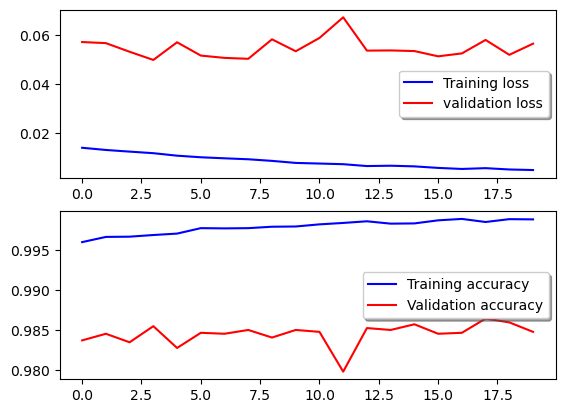

In [56]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.legend(loc='best', shadow=True)

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [48]:
val_y_pred = model.predict(X_val)
val_y_pred = np.argmax(val_y_pred,axis=1)
accuracy_score(np.argmax(y_val,axis=1),val_y_pred)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.9821428571428571

We can  clearly see that a **plain LeNet** can get a really good acc (better than *RF* and *KNN*)

In [49]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)
# pd.DataFrame({"ImageId":np.arange(1,len(y_test_pred)+1),"Label":y_test_pred}).to_csv("LeNet_submission.csv",index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


## Advanced technique

We will go through another Net, which use dropout, BatchNorm and also adam optimizer & learning rate schedule  
For the detail of those terms, revise the old note 

In [50]:
"""
  [[Conv2D(relu) -> BatchNormalization]*2 -> MaxPool2D -> Dropout]*2 -> 
  Conv2D(relu) -> BatchNormalization -> Dropout -> 
  Flatten -> Dense(relu) -> BatchNormalization -> Dropout -> Dense(softmax)
"""
0

0

also, here Im using MaxPool instead of AvgPool

In [92]:
model2 = Sequential()

model2.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Dense(10, activation = "softmax"))

d:\DownloadDiskD\conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 7, 7, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,314 (837.16 KB)

 Trainable params: 213,642 (834.54 KB)

 Non-trainable params: 672 (2.62 KB)

Note: we can increase the filter for each Conv layer, but because i dont want to run for so long, so i just drop it to 32 filters.

In [94]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [95]:
model2.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


In [96]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [97]:
history = model2.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.8003 - loss: 0.6187 - val_accuracy: 0.9794 - val_loss: 0.0640 - learning_rate: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.9597 - loss: 0.1265 - val_accuracy: 0.9844 - val_loss: 0.0502 - learning_rate: 0.0010
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.9724 - loss: 0.0883 - val_accuracy: 0.9858 - val_loss: 0.0429 - learning_rate: 0.0010
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9751 - loss: 0.0768 - val_accuracy: 0.9877 - val_loss: 0.0422 - learning_rate: 0.0010
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.9804 - loss: 0.0612 - val_accuracy: 0.9889 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.9806 - loss: 0.0590 - val_accuracy: 0.9893 - val_loss: 0.0377 - learning_rate: 0.0010
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accura

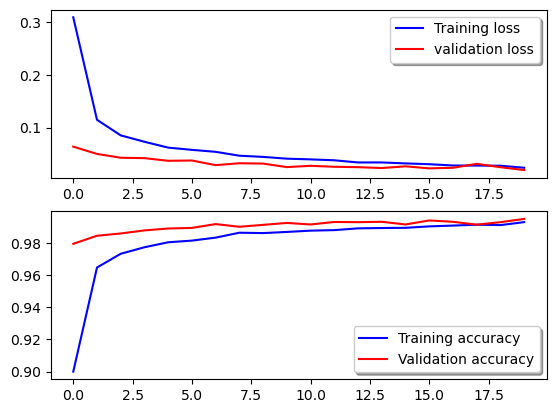

In [98]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.legend(loc='best', shadow=True)

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [99]:
val_y_pred = model2.predict(X_val)
val_y_pred = np.argmax(val_y_pred,axis=1)
accuracy_score(np.argmax(y_val,axis=1),val_y_pred)

263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


0.9948809523809524

In [100]:
y_test_pred = np.argmax(model2.predict(X_test),axis=1)
pd.DataFrame({"ImageId":np.arange(1,len(y_test_pred)+1),"Label":y_test_pred}).to_csv("advanced_technique_CNN_submission.csv",index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
